<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Most%20upgraded%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 8.6 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

In [32]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [33]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [110]:
df.columns

Index(['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature',
       'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3',
       'CO2 Uptake'],
      dtype='object')

In [111]:
df.shape


(166, 8)

In [34]:
# Split the data into training and test sets
X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values


In [35]:
# # Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# # Convert to panda dataframe with specified column names
column_names = ['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature', 'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3']
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

# GirdSearch and 5-fold CV for polynomial regression

In [120]:
X_scaled, y = make_regression(n_samples=166, n_features=6, noise=0.1, random_state=42)

In [121]:
from sklearn.pipeline import Pipeline

In [122]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

In [123]:
param_grid = {
    'poly__degree': [2, 3, 4],          # degree of polynomial
    'linear__fit_intercept': [True, False]
}

In [124]:
from sklearn.metrics import mean_squared_error, make_scorer

In [125]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [126]:
# grid_search = grid.fit(X_scaled, y)
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5)
# Fit the grid search object to the data
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [127]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters found:  {'linear__fit_intercept': True, 'poly__degree': 2}
Best score:  -0.011159319532683351


In [128]:
# use best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [129]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on test set: {mse}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'R² Score on test set: {r2}')

Mean Squared Error on test set: 0.01635377197635291
Mean Absolute Error on test set: 0.10453110695736345
R² Score on test set: 0.9999982546520781










# Without 5-fold CV


In [83]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [84]:
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer)
grid_search.fit(X_scaled, y)

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [85]:
print("Best parameters found (Grid Search): ", grid_search.best_params_)
print("Best score (Grid Search): ", grid_search.best_score_)

Best parameters found (Grid Search):  {'linear__fit_intercept': True, 'poly__degree': 2}
Best score (Grid Search):  -0.012343054140358837


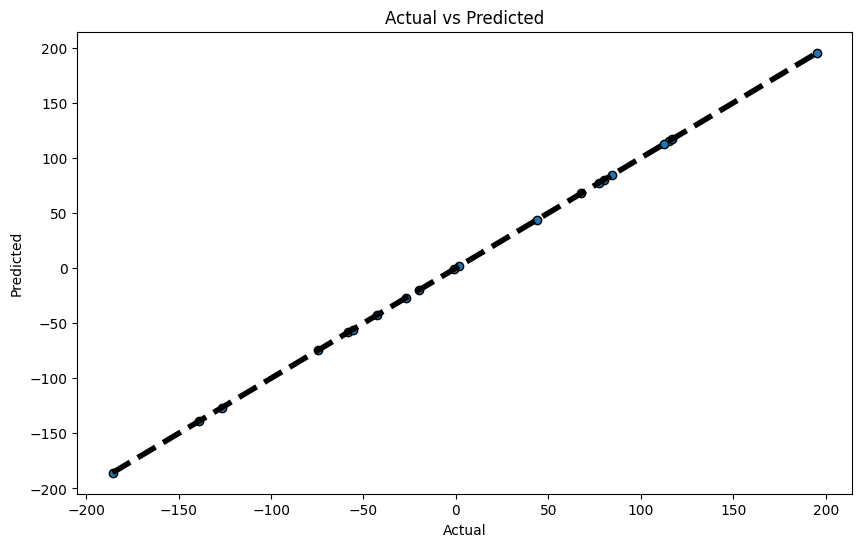

In [89]:
# plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


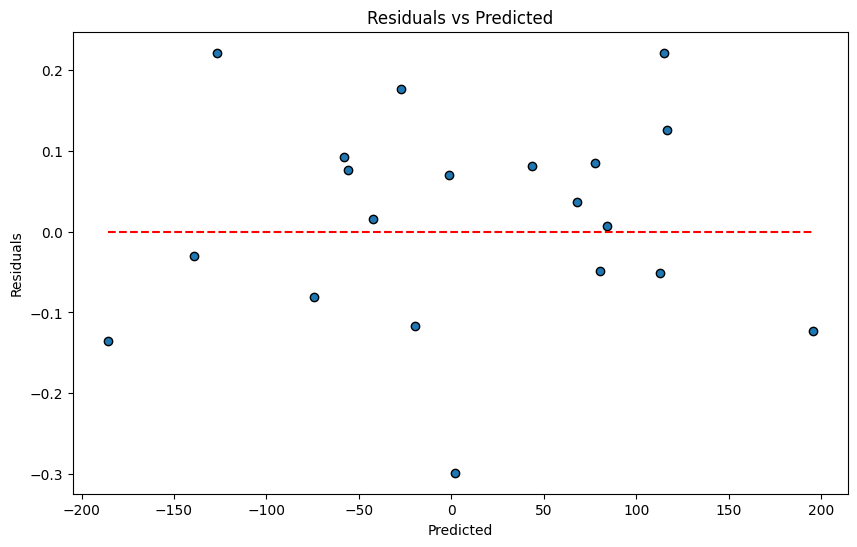

In [90]:
# Residual plots
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


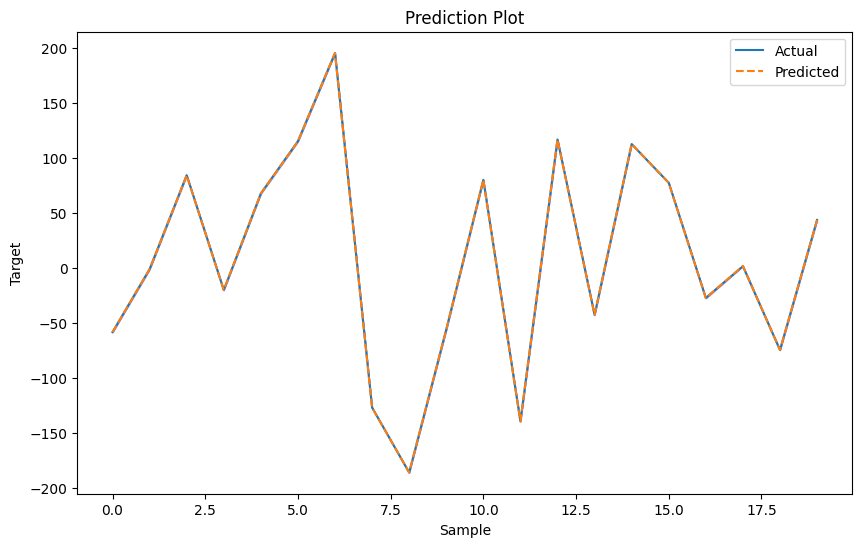

In [91]:
# produce range of test set
x_range = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_test, label='Actual')
plt.plot(x_range, y_pred, label='Predicted', linestyle='--')
plt.fill_between(x_range, y_pred - 1.96 * np.std(residuals), y_pred + 1.96 * np.std(residuals), alpha=0.3, color='b')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.title('Prediction Plot')
plt.legend()
plt.show()






# Randomized search using the 5-fold cross-validation.

In [102]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint

In [112]:
X_scaled, y = make_regression(n_samples=166, n_features=6, noise=0.1, random_state=42)

In [113]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

In [114]:
param_distributions = {
    'poly__degree': randint(2, 5),              # The degree chosen from 2-5
    'linear__fit_intercept': [True, False]
}

In [115]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [116]:
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, scoring=scorer, cv=kf)
random_search.fit(X_scaled, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('linear', LinearRegression())]),
                   param_distributions={'linear__fit_intercept': [True, False],
                                        'poly__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cfcd8a6a590>},
                   scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [117]:
print("Best parameters found (Randomized Search with 5-fold CV): ", random_search.best_params_)
print("Best score (Randomized Search with 5-fold CV): ", random_search.best_score_)

Best parameters found (Randomized Search with 5-fold CV):  {'linear__fit_intercept': True, 'poly__degree': 2}
Best score (Randomized Search with 5-fold CV):  -0.013241199801356693
